In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
# Load the dataset
data = pd.read_csv("World.csv")


# Ensure 'Year' is in datetime format for Prophet
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             100 non-null    datetime64[ns]
 1   Region           100 non-null    object        
 2   Domestic Demand  100 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.5+ KB


In [3]:
data.head()

,Year,Region,Domestic Demand
0,2005-01-01,NAM,7261
1,2006-01-01,NAM,7034
2,2007-01-01,NAM,6579
3,2008-01-01,NAM,5363
4,2009-01-01,NAM,4556


In [4]:
# store forecast results for each region
forecast_list = []

# Loop through each region in the dataset
for region, region_data in data.groupby('Region'):
    
    # Filter data for the region
    region_data = region_data[region_data['Year'] <= '2024']
    
    # Prepare data for Model
    prophet_data = region_data[['Year', 'Domestic Demand']].rename(columns={'Year': 'ds', 'Domestic Demand': 'y'})
    
    # Model for each region
    model = Prophet(yearly_seasonality=True)
    model.fit(prophet_data)
    
    # future DataFrame and forecast
    future = model.make_future_dataframe(periods=6, freq='Y')  # Forecasting 6 years ahead
    forecast = model.predict(future)
    
    # Add the region information to the forecast results
    forecast['Region'] = region
    
    # Keep only relevant columns
    forecast = forecast[['ds', 'yhat', 'Region']]
    
    # Rename columns
    forecast.rename(columns={'ds': 'Year', 'yhat': 'Forecasted Demand'}, inplace=True)
    
    # Append forecast to the list
    forecast_list.append(forecast)


14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] done processing
14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] done processing
14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] done processing
14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:44 - cmdstanpy - INFO - Chain [1] done processing
14:42:44 - cmdstanpy - INFO - Chain [1] start processing
14:42:45 - cmdstanpy - INFO - Chain [1] done processing
14:42:45 - cmdstanpy - INFO - Chain [1] start processing
14:42:45 - cmdstanpy - INFO - Chain [1] done processing
14:42:45 - cmdstanpy - INFO - Chain [1] start processing
14:42:45 - cmdstanpy - INFO - Chain [1] done processing
14:42:45 - cmdstanpy - INFO - Chain [1] start processing
14:42:45 - cmdstanpy - INFO - Chain [1] done processing
14:42:45 - cmdstanpy - INFO - Chain [1] start processing
14:42:45 - cmdstanpy - INFO - Chain [1]

In [5]:
# Combine all regional forecasts
all_forecasts = pd.concat(forecast_list).reset_index(drop=True)

# combined forecast data
print("Combined Forecast Data:")
print(all_forecasts.head())


Combined Forecast Data:
        Year  Forecasted Demand Region
0 2005-01-01         659.880260    AFR
1 2006-01-01         705.773846    AFR
2 2007-01-01         754.410758    AFR
3 2008-01-01         805.733797    AFR
4 2009-01-01         853.412490    AFR


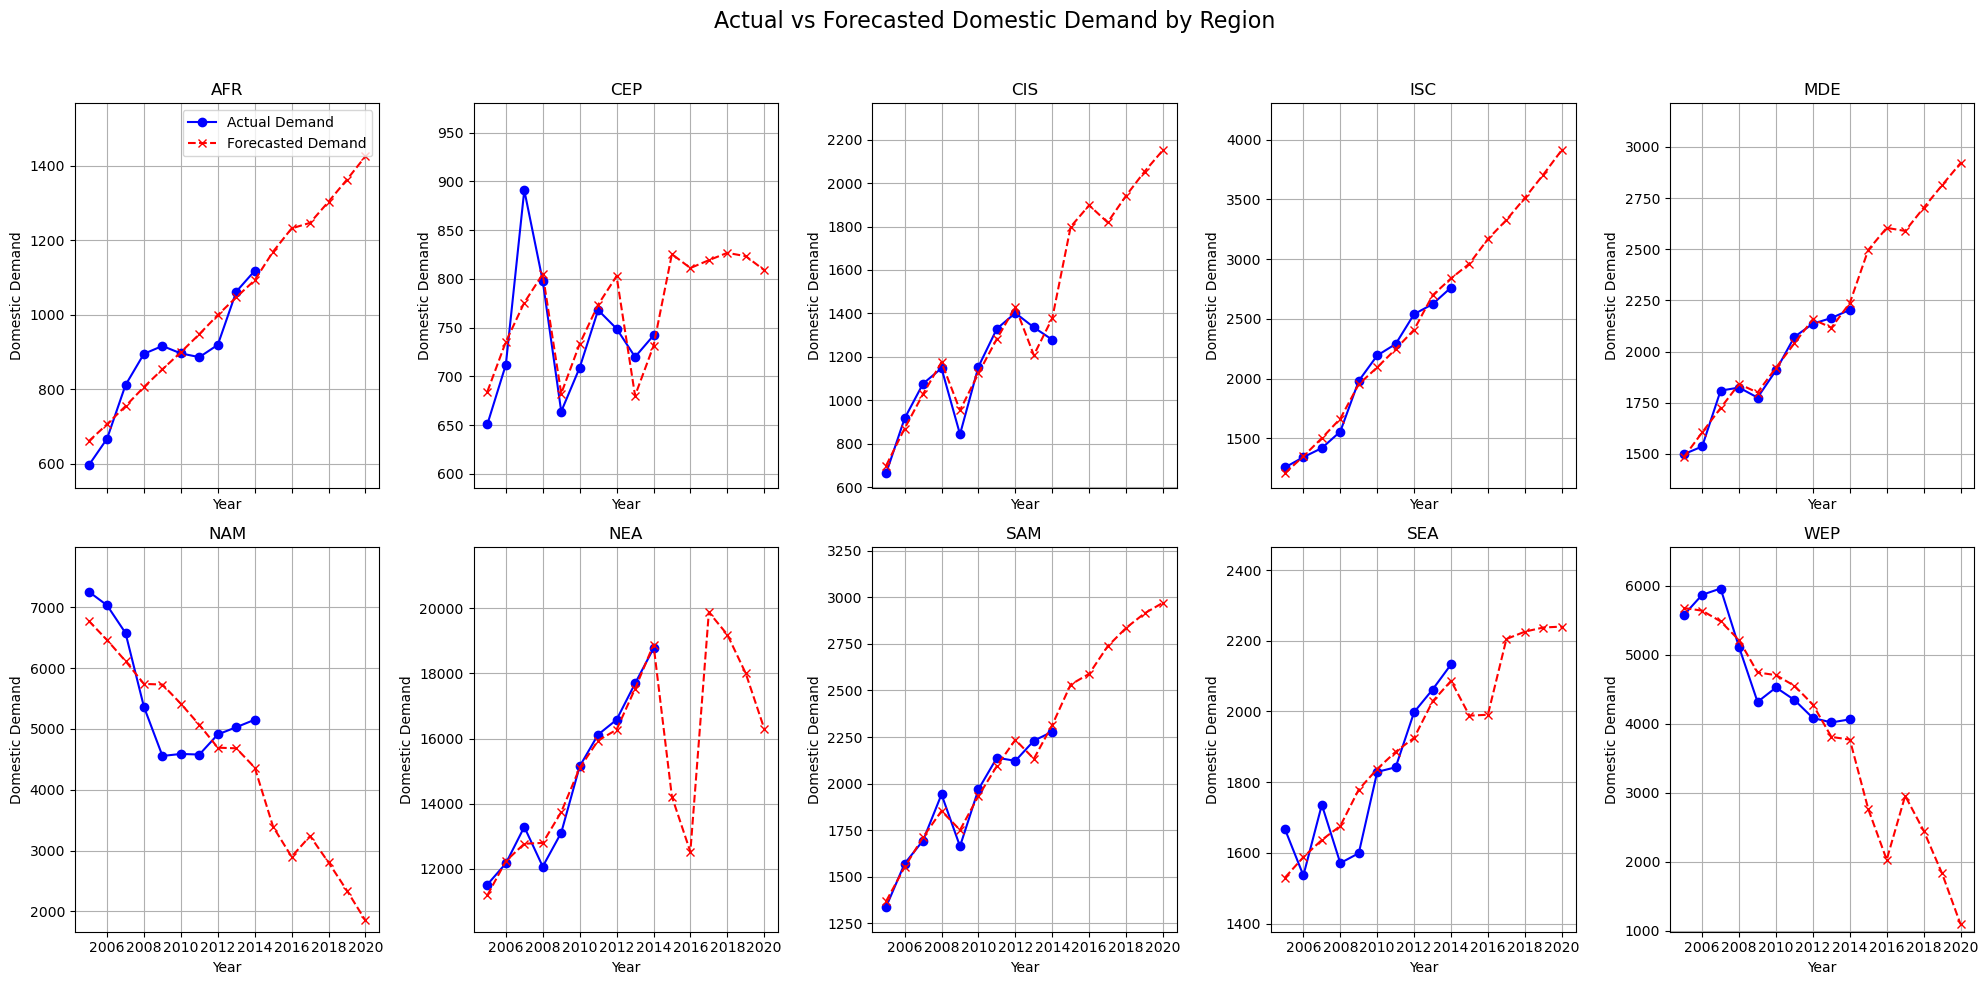

In [6]:
# subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True)
fig.suptitle('Actual vs Forecasted Domestic Demand by Region', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each region and plot actual vs. forecasted demand in each subplot
for i, (region, region_data) in enumerate(data.groupby('Region')):
    # Select the current axis for this region's subplot
    ax = axes[i]
    
    # Actual data for the region
    ax.plot(region_data['Year'], region_data['Domestic Demand'], label='Actual Demand', color='blue', marker='o')
    
    # Forecasted data for the region
    forecast_region = all_forecasts[all_forecasts['Region'] == region]
    ax.plot(forecast_region['Year'], forecast_region['Forecasted Demand'], label='Forecasted Demand', color='red', linestyle='--', marker='x')

    # Set titles and labels for each subplot
    ax.set_title(region)
    ax.set_xlabel('Year')
    ax.set_ylabel('Domestic Demand')
    ax.grid(True)
    
    # Calculate y-axis limits based on min and max of actual and forecasted demand
    y_min = min(region_data['Domestic Demand'].min(), forecast_region['Forecasted Demand'].min())
    y_max = max(region_data['Domestic Demand'].max(), forecast_region['Forecasted Demand'].max())
    ax.set_ylim(y_min - 0.1 * abs(y_min), y_max + 0.1 * abs(y_max))  # Adding 10% padding for better visualization

    # Show legend only in the first subplot for clarity
    if i == 0:
        ax.legend()

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
plt.show()
